# T Test
A t-test is a type of inferential statistic which is used to determine if there is a significant difference between the means of two groups which may be related in certain features

T-test has 2 types : 1. one sampled t-test 2. two-sampled t-test.

# One-sample T-test with Python
The test will tell us whether means of the sample and the population are different

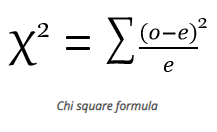

In [1]:
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]
len(ages)

32

In [2]:
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [3]:
## Lets take sample

sample_size=10
age_sample=np.random.choice(ages,sample_size)
age_sample
print(np.mean(age_sample))

34.9


In [10]:
from scipy.stats import ttest_1samp
ttest,p_value=ttest_1samp(age_sample,30)
print(p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.36621160949582254
we are accepting null hypothesis


### Some More Examples
Consider the age of students in a college and in Class A

52
[52 46 40 40 47 50 51 45 44 52 46 53 43 44 51 50 54 42 54 45 61 53 49 46
 47 41 45 51 43 45 48 50 40 52 44 55 54 40 45 46 54 42 46 35 51 51 46 48
 47 35 52 52 39 44 48 40 42 46 47 45]


C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0.2817359080201697


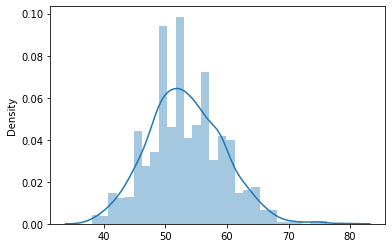

In [6]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import skew
import math
np.random.seed(6)
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=60)
print(school_ages[5])
print(classA_ages)
import seaborn as sns
sns.distplot(a=school_ages)
print(skew(school_ages))

In [7]:
print(classA_ages.mean())
school_ages.mean()


46.9


53.303333333333335

In [8]:
# Calculate the T-test for the mean of ONE group of scores.
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())
p_value


1.139027071016194e-13

In [9]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


### Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test

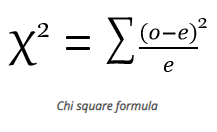

In [15]:
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [16]:
# Calculate the T-test for the means of *two independent* samples of scores.
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


# Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [17]:
weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)
weight2

array([30.57926457, 34.91022437, 29.00444617, 30.54295091, 19.86201983,
       37.57873174, 18.3299827 , 21.3771395 , 36.36420881, 32.05941216,
       26.93827982, 29.519014  , 26.42851213, 30.50667769, 41.32984284])

In [18]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [23]:
# Calculate the t-test on TWO RELATED samples of scores, a and b.
# that 2 related or repeated samples have identical average (expected) values.
_,p_value=stats.ttest_rel(a=weight1,b=weight2)
print(np.mean(weight1))
print(np.mean(weight2))

30.466666666666665
29.688713815767944


In [24]:
print(p_value)
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

0.5732936534411279
we are accepting null hypothesis


# Chi-square Test
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.

Ho = There is no relationship B/W variables

H1 = There is a relation Between variables

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')
dataset

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [26]:
dataset_table=pd.crosstab(dataset['sex'],dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [27]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :\n",Observed_Values)

Observed Values :
 [[60 97]
 [33 54]]


In [29]:
import scipy.stats as stats
val=stats.chi2_contingency(dataset_table)
val #We are interested in the array 

(0.008763290531773594,
 0.925417020494423,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [30]:
# (column_total * row_total / total_obs)
Expected_Values=val[3]
Expected_Values

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [31]:
no_of_rows = len(dataset_table)
no_of_columns = len(dataset_table.columns)
print(no_of_rows, no_of_columns)

ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

2 2
Degree of Freedom:- 1


In [32]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
print(chi_square)
chi_square_statistic=chi_square[0]+chi_square[1]
chi_square_statistic

[0.00119737 0.00073745]


0.001934818536627623

In [33]:
ob,ex = zip(Observed_Values , Expected_Values)
print(ob ,"--", ex)
print(ob[0] , "--", ex[0])
for ob , ex in zip(Observed_Values , Expected_Values):
    print(ob , '^^', ex)

(array([60, 97], dtype=int64), array([59.84016393, 97.15983607])) -- (array([33, 54], dtype=int64), array([33.15983607, 53.84016393]))
[60 97] -- [33 54]
[60 97] ^^ [59.84016393 97.15983607]
[33 54] ^^ [33.15983607 53.84016393]


In [34]:
critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [35]:
#p-value
p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [36]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")
    
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables
Retain H0,There is no relationship between 2 categorical variables


# Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

# One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

Null : All sample means are equal
Limitation : It won't tell us that which group is different for this we use F-statistic and run a "adc hoc test https://amzn.to/2sQXcxi " to tell us which group has difference in means .

In [2]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [3]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df_anova = df1[['sepal_length','species']]
df_anova

,sepal_length,species
0,5.1,setosa
1,4.9,setosa
2,4.7,setosa
3,4.6,setosa
4,5.0,setosa
...,...,...
145,6.7,virginica
146,6.3,virginica
147,6.5,virginica
148,6.2,virginica


In [9]:
l1 = df_anova['species'].unique().tolist()
anova_dic = {spec : df_anova['sepal_length'][df_anova['species'] == spec] for spec in l1}
print(l1)
anova_dic

['setosa', 'versicolor', 'virginica']


{'setosa': 0     5.1
 1     4.9
 2     4.7
 3     4.6
 4     5.0
 5     5.4
 6     4.6
 7     5.0
 8     4.4
 9     4.9
 10    5.4
 11    4.8
 12    4.8
 13    4.3
 14    5.8
 15    5.7
 16    5.4
 17    5.1
 18    5.7
 19    5.1
 20    5.4
 21    5.1
 22    4.6
 23    5.1
 24    4.8
 25    5.0
 26    5.0
 27    5.2
 28    5.2
 29    4.7
 30    4.8
 31    5.4
 32    5.2
 33    5.5
 34    4.9
 35    5.0
 36    5.5
 37    4.9
 38    4.4
 39    5.1
 40    5.0
 41    4.5
 42    4.4
 43    5.0
 44    5.1
 45    4.8
 46    5.1
 47    4.6
 48    5.3
 49    5.0
 Name: sepal_length, dtype: float64,
 'versicolor': 50    7.0
 51    6.4
 52    6.9
 53    5.5
 54    6.5
 55    5.7
 56    6.3
 57    4.9
 58    6.6
 59    5.2
 60    5.0
 61    5.9
 62    6.0
 63    6.1
 64    5.6
 65    6.7
 66    5.6
 67    5.8
 68    6.2
 69    5.6
 70    5.9
 71    6.1
 72    6.3
 73    6.1
 74    6.4
 75    6.6
 76    6.8
 77    6.7
 78    6.0
 79    5.7
 80    5.5
 81    5.5
 82    5.8
 83    6.0
 84    5.4
 85 

In [11]:
anova_dic['setosa']

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length, dtype: float64

In [12]:
from scipy import stats
F, p = stats.f_oneway(anova_dic['setosa'], anova_dic['versicolor'], anova_dic['virginica'])
print(F ,"--" , p)

119.26450218450468 -- 1.6696691907693826e-31


In [13]:
if p<0.05:
    print("reject null hypothesis(that they have same population mean)")
else:
    print("accept null hypothesis(that they have same population mean)")

reject null hypothesis(that they have same population mean)


# Two-way Anova test
Assumptions : The population must be close to a normal distribution.
Samples must be independent.
Population variances must be equal.
Groups must have equal sample sizes.